#### **Task 1**

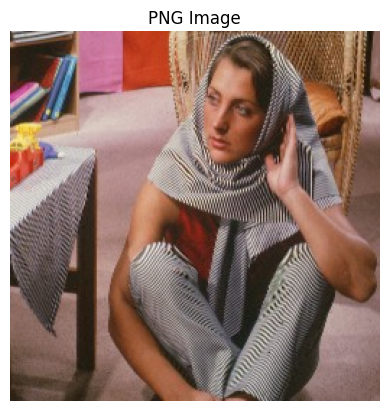

In [4]:
#Loading using three different ways. 
# 1. PIL library (png)

import matplotlib.pyplot as plt
from PIL import Image
import numpy as np 

# Load and convert the image to a numpy array
image = Image.open(r'data\Lab1\task1\barbara.png')
image_array = np.array(image)

# Display the image
plt.imshow(image_array)
plt.axis('off')  
plt.title('PNG Image')
plt.show()

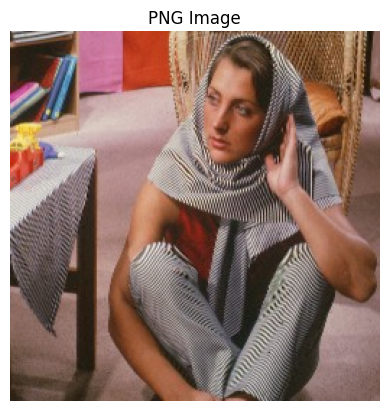

In [12]:
##Using openCV (png)
import cv2
import matplotlib.pyplot as plt


image_opencv = cv2.imread(r'data\Lab1\task1\barbara.png')


image_rgb = cv2.cvtColor(image_opencv, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis('off')
plt.title('PNG Image')
plt.show()

dict_keys(['__header__', '__version__', '__globals__', 'barbara'])
(256, 256, 3)


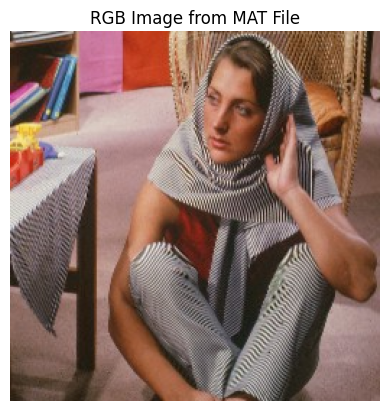

In [9]:
from scipy.io import loadmat
import matplotlib.pyplot as plt

#Using scipy for (mat) 
mat_data = loadmat(r'data\Lab1\task1\barbara.mat')

print(mat_data.keys())

rgb_image = mat_data['barbara']
print(rgb_image.shape)
plt.imshow(rgb_image)
plt.axis('off')  
plt.title('RGB Image from MAT File')
plt.show()

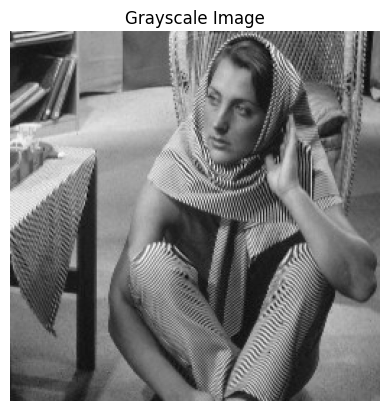

In [14]:
#Convert to grayscale using opencv

gray_image = cv2.cvtColor(image_opencv, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.title('Grayscale Image')
plt.show()

In [32]:
#Check the Check image size, number of channels, and convert between classes e.g. double to uint8 and vice versa.

height, width, channels = image_opencv.shape
#Values between 0 and 1 only valid for floats
image_double = image_opencv.astype(np.float64) / 255.0
image_u8 = (image_double * 255).astype(np.uint8)

print(f"Size of image is {height},{width} with {channels} channels")


Size of image is 256,256 with 3 channels


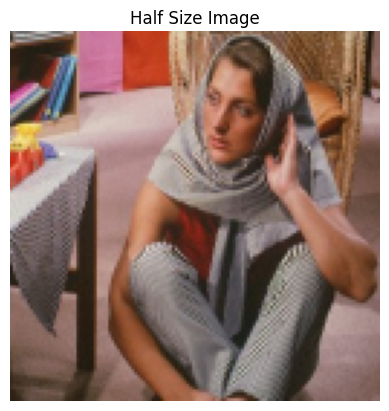

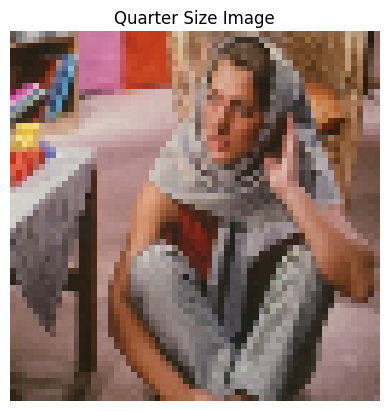

In [35]:
#Lets use cv2.resize! 
#cv2.resize(src, dsize, fx, fy), where src = image, dsize = size of image (if 0,0 it is determined by the scaling). fx and fy is the scaling. 

#Scaling is basically to increase or decrease the number of pixels in the image.
# Scale down to half size
half_size_image = cv2.resize(image_rgb, (0, 0), fx=0.5, fy=0.5)

# Scale down to quarter size
quarter_size_image = cv2.resize(image_rgb, (0, 0), fx=0.25, fy=0.25)

# Display the half-size image
plt.imshow(half_size_image)
plt.axis('off')
plt.title('Half Size Image')
plt.show()

# Display the quarter-size image
plt.imshow(quarter_size_image)
plt.axis('off')
plt.title('Quarter Size Image')
plt.show()

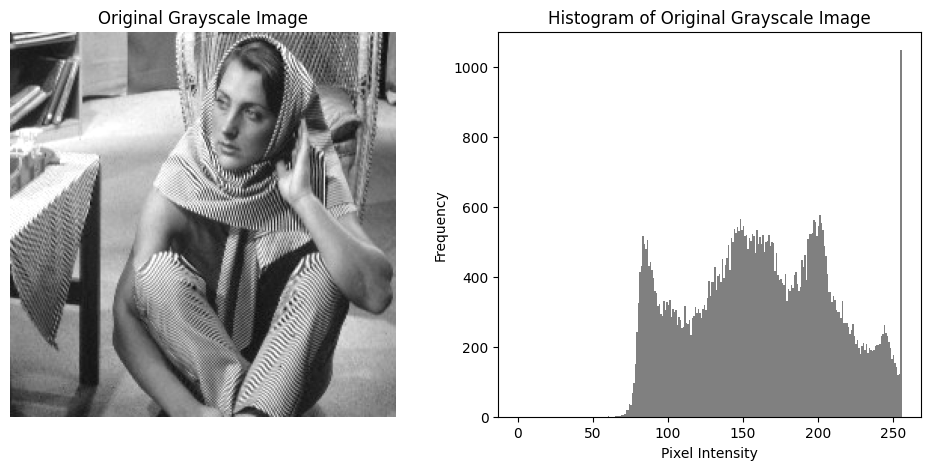

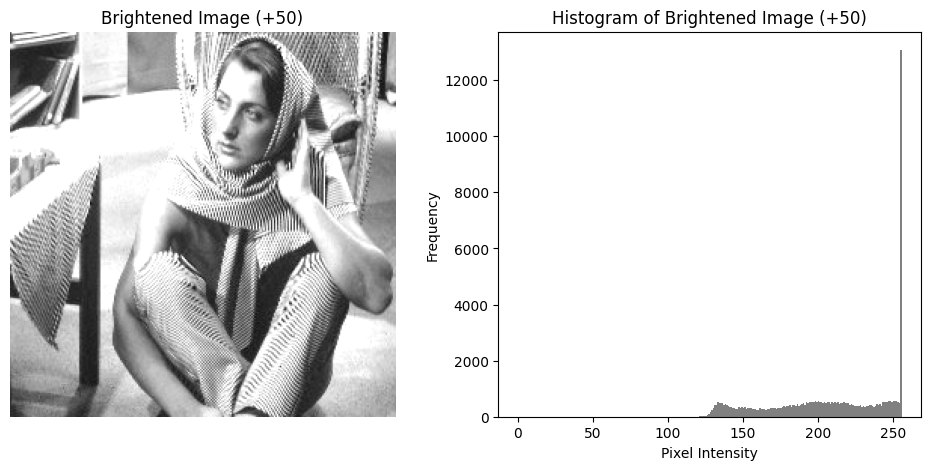

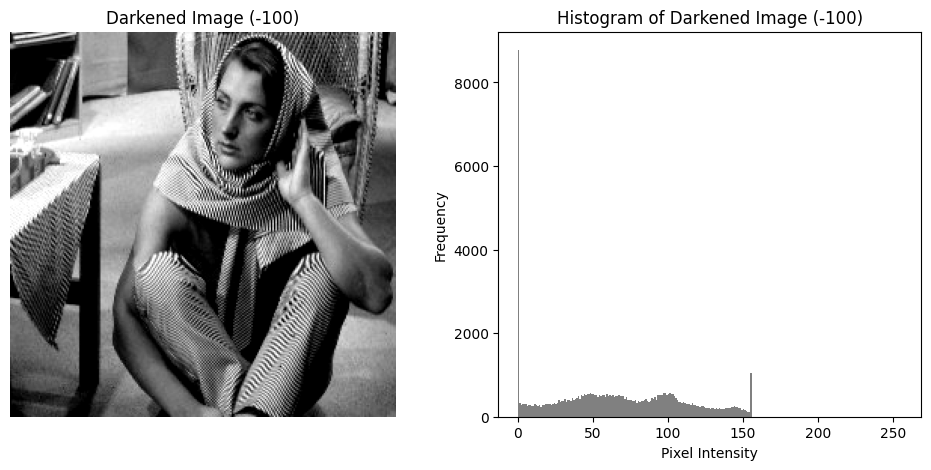

In [48]:
def adjust_brightness(image, value):
    image_int = image.astype(np.int16)

    # Adjust the brightness
    brightened_image = image_int + value
    brightened_image = np.clip(brightened_image, 0, 255)
    return brightened_image

bright_image = adjust_brightness(gray_image, 50)
dark_image = adjust_brightness(gray_image, -100)

def plot_image_and_histogram(image, title):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.title(title)
    plt.subplot(1, 2, 2)
    plt.hist(image.ravel(), bins=256, range=[0, 256], color='gray')
    plt.title(f'Histogram of {title}')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()

plot_image_and_histogram(gray_image, 'Original Grayscale Image')
plot_image_and_histogram(bright_image, 'Brightened Image (+50)')
plot_image_and_histogram(dark_image, 'Darkened Image (-100)')

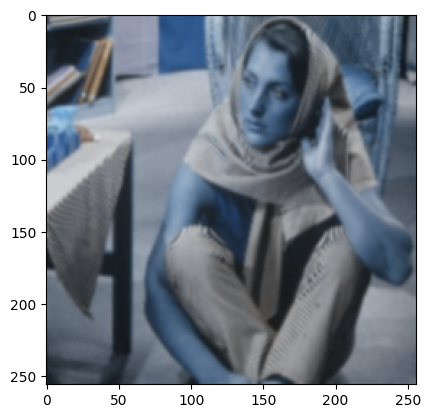

In [49]:
from scipy.ndimage import gaussian_filter, sobel, laplace
#Play around with some python equivalent functions 
# Gaussian filter
gaussian_filtered = gaussian_filter(image_opencv, sigma=1)
plt.imshow(gaussian_filtered)


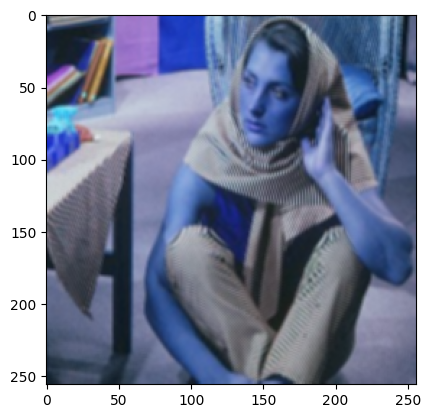

In [51]:
#simple average filter
kernel = np.ones((3, 3), np.float32) / 9
filtered_image = cv2.filter2D(image_opencv, -1, kernel)
plt.imshow(filtered_image)

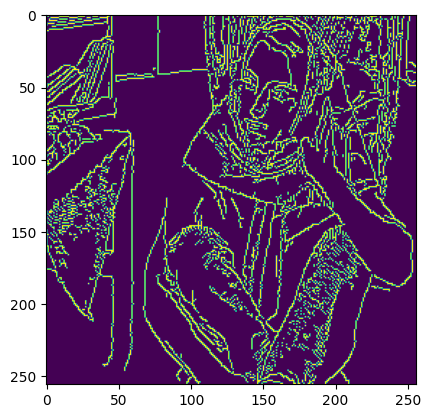

In [52]:
#Edge detection
edges = cv2.Canny(image, 100, 200)
plt.imshow(edges)